<a href="https://colab.research.google.com/github/walbertcm/DeepLearning/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Básico

#Imprimir
print('Bom dia')

#Variaveis
codigo = 369
print(codigo)

#Listas
lista_A=[10,20,30]
print(lista_A)

#Selecionar elemento da lista
print(lista_A[1])

#Imprimir tamanho da lista
print(len(lista_A))


Bom dia
369
[10, 20, 30]
20
3


TensorFlow

In [6]:
#ImportTensorFlow
from tensorflow import keras

from keras.datasets import mnist

from tensorflow.python.keras import Sequential #Arquitetura da rede
from tensorflow.python.keras.layers import Dense, Dropout #Neuroni, regularizado
from tensorflow.compat.v1.keras.optimizers import RMSprop #Otimizador

In [7]:
#Carregar e dividir os dados
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
print("Quantidade de imagens para teste", len(x_teste))
print("Quantidade de imagens para treino",len(x_treino))
print(type(x_treino))


Quantidade de imagens para teste 10000
Quantidade de imagens para treino 60000
<class 'numpy.ndarray'>


In [ ]:
#Imprimindo a primeira imagem
imgA = x_teste[0]

for x in imgA:
  print(imgA)


A imagem 4


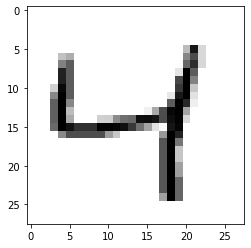

In [16]:
import matplotlib.pyplot as plt

indice = 2

print("A imagem", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)

In [ ]:
#Fluxo para construção de rede neural

#Organizar camada de entrada
#Organizar camada de saida
#Estruturar rede neural
#Treinar o modelo
#Fazer as previsões

In [17]:
#Achatamento da matrix (conversão de 28x28 para 784 x 1) flatten

# Achatando a matriz de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)

x_teste = x_teste.reshape(quantidade_teste, resolucao_total)


In [18]:
#Normalização
#255 vire 1
#127 vire 0.5
#E assim vai

#Pegar o valor que eu quero tanaformar e dividir pelo valor maximo do meu intervalo
#Exemplo, se eu dividir 255 por 255  = 1
#Exemplo, se eu dividi 125 por 255 = 0.5
#Exemplo, se eu dividir 0 por 255 = 0

#Quando eu divido uint8 por algum numero, recebemos um float64
#Porém, o tensorflow precisa de float32 para trabalhar
#Portanto, precisamos converter o tipo antes de dividi-lo

#Conversão
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /=255 #Divide todos os valores por 255 e armazena o resultado em x_treino
x_teste /=255 #Divide todos os valores por 255 e armazena o resultado em x_teste

In [20]:
print(x_treino[0][350], type(x_treino[0][350]))

print(x_treino[0])

0.27450982 <class 'numpy.float32'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

In [ ]:
#Preparação da camada de saída
#Quais são as possibilidade de saída NUmeros de 0 a 9
#0,1,2,3,4,5,6,7,8,9
#[0,0,0,0,0,0,0,0,0,0]
#Numero 1 - [1,0,0,0,0,0,0,0,0,0]
#Numero 3 - [0,0,1,0,0,0,0,0,0,0]